# Helpful Links
Tutorial provided by Professor Chanin Nantasenamat. 

[Data Professor YouTube Channel](https://www.youtube.com/dataprofessor/)

[Link to YouTube Tutorial](https://www.youtube.com/watch?v=jBlTQjcKuaY&t=640s)


*First modified: 21 May 2022*

*Last modified: 27 May 2022* 	


This notebook performs a descriptor calculation and peforms some exploratory data analysis. 

# Installing conda and rdkit package in Google Colab
[rdkit.org](https://www.rdkit.org/)

* rdkit is an open source toolkit for cheminformatics
* used to gather the molecular descriptors for a given set of compounds

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-27 15:56:40--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   103MB/s    in 0.8s    

2022-05-27 15:56:41 (103 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Load bioactivity data from Google Drive
Load data from Part01 into a dataframe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filepath = "/content/drive/MyDrive/FCC Python for Bioinformatics/"

df = pd.read_csv(filepath + "data/bioactivity_preprocessed_data.csv")

df.head()

Mounted at /content/drive


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


# Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) of a compound and is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated druglike molecule should have the following properties:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10


## Calculate descriptors

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
# smiles contains the chemical information about the molecule (the structure)

df_lipinski = lipinski(df.canonical_smiles)

print(df_lipinski.info())

df_lipinski.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MW             133 non-null    float64
 1   LogP           133 non-null    float64
 2   NumHDonors     133 non-null    float64
 3   NumHAcceptors  133 non-null    float64
dtypes: float64(4)
memory usage: 4.3 KB
None


,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0


In [ ]:
# use pd.concat to combine dataframes

df_combined = pd.concat([df, df_lipinski], axis = 1)

In [ ]:
# check the dataframe

print(df_combined.info())

df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  133 non-null    object 
 1   canonical_smiles    133 non-null    object 
 2   standard_value      133 non-null    float64
 3   bioactivity_class   133 non-null    object 
 4   MW                  133 non-null    float64
 5   LogP                133 non-null    float64
 6   NumHDonors          133 non-null    float64
 7   NumHAcceptors       133 non-null    float64
dtypes: float64(5), object(3)
memory usage: 8.4+ KB
None


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0


# Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10^-9
* Take the molar value and apply -log10
* Delete the standard_value column and create a new pIC50 column

In [ ]:
df_combined["standard_value"].describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

Note there are some very large values present. Values greater than 100,000,000 will be fixed at 100,000,00 otherwise applying the negative log10 function will cause them to become negative. 

In [ ]:
# define empty list for normalised values
normalised_values = []

# interate through rows in the column and append to list where appropriate
for value in df_combined["standard_value"]:
  if value > 100000000:
    normalised_values.append(100000000)
  else:
    normalised_values.append(value)

# debug print statement
# print(len(normalised_values))

# set the column to equal the list
df_combined_norm = df_combined.copy(deep = True)
df_combined_norm["standard_value"] = normalised_values

# check using .describe()
df_combined_norm["standard_value"].describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value, dtype: float64

Create a function to transform IC50 into pIC50 and apply to the dataframe.

In [ ]:
def pIC50(dataframe):
  new_dataframe = dataframe.copy(deep = True)

  # apply the specified transformations
  new_dataframe["pIC50"] = -np.log10(new_dataframe["standard_value"] * pow(10, -9)) 

  new_dataframe.drop(["standard_value"], axis = 1, inplace = True)

  return new_dataframe

df_pIC50 = pIC50(df_combined_norm)
df_pIC50.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


In [ ]:
df_pIC50["pIC50"].describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

Now, remove the "intermediate" bioactivity class to allow direct comparison between the different classes.

In [ ]:
df_pIC50_extremes = df_pIC50[df["bioactivity_class"] != "intermediate"]

df_pIC50_extremes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 2 to 132
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  119 non-null    object 
 1   canonical_smiles    119 non-null    object 
 2   bioactivity_class   119 non-null    object 
 3   MW                  119 non-null    float64
 4   LogP                119 non-null    float64
 5   NumHDonors          119 non-null    float64
 6   NumHAcceptors       119 non-null    float64
 7   pIC50               119 non-null    float64
dtypes: float64(5), object(3)
memory usage: 8.4+ KB


# Exploratory data analysis (chemical space analysis) via Lipinski descriptors

## Import library

In [ ]:
import seaborn as sns
sns.set(style = "ticks")

import matplotlib.pyplot as plt

## Frequency plot of the two bioactivity classes
The plot shows where are more entries for the inactive class than the active class.

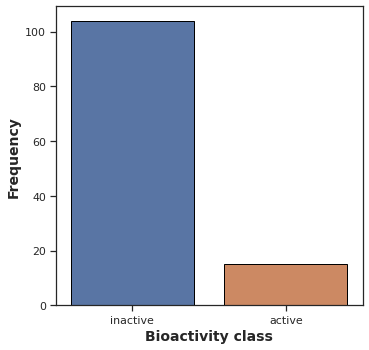

In [ ]:
plt.figure(
    figsize = (5.5, 5.5)
)

sns.countplot(
    x="bioactivity_class", 
    data = df_pIC50_extremes, 
    edgecolor = "black"
  )

plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 14, fontweight = "bold")


plt.savefig("/content/drive/MyDrive/FCC Python for Bioinformatics/figures/Part02/countplot.pdf")

## Scatter plot of MW versus LogP

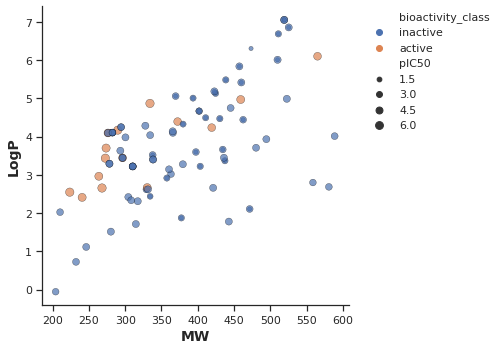

In [ ]:
fig, ax = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5.5, 5.5)
)

sns.scatterplot(
    x = "MW", 
    y = "LogP",
    data = df_pIC50_extremes,
    hue = "bioactivity_class",
    size = "pIC50",
    edgecolor = "black", 
    alpha = 0.7
)

ax.set_xlabel("MW", fontsize = 14, fontweight = "bold")
ax.set_ylabel("LogP", fontsize = 14, fontweight = "bold")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(
    bbox_to_anchor = (1.05, 1), 
    loc = 2, 
    borderaxespad = 0,
    frameon = False
)

plt.savefig(
    "/content/drive/MyDrive/FCC Python for Bioinformatics/figures/Part02/scatterplot.pdf",
    bbox_inches = "tight"
)

The above plot shows that the two bioactivity classes:
* have similar ranges of molecular weight.
* have similar ranges of pIC50 values.

Inactive molecules appear to span a wider range of LogP values compared to active molecules. 

## Box plots
The function below allows quick plotting of a given column in a dataframe. A filename for the .png output is also required. 

In [ ]:
def boxplot(dataframe, col_name, filename):
  fig, ax = plt.subplots(
      nrows = 1,
      ncols = 1,
      figsize = (5.5, 5.5)
  )

  sns.boxplot(x = "bioactivity_class", y = col_name, data = dataframe)

  ax.set_xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
  ax.set_ylabel(col_name, fontsize = 14, fontweight = "bold")

  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  plt.savefig(
      "/content/drive/MyDrive/FCC Python for Bioinformatics/figures/" + filename + ".png",
      bbox_inches = "tight"
  )

### pIC50 values

This distribution is to be expected as the bioactivity class was determined using the standard value. 

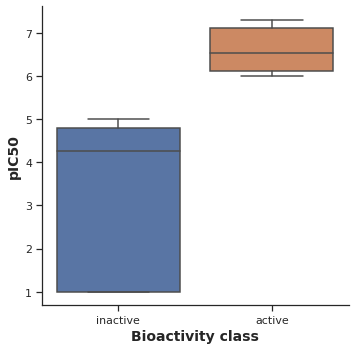

In [ ]:
boxplot(df_pIC50_extremes, "pIC50", "Part02/pIC50_boxplot")

### LogP 
Distributions are similar. Inactive class has two outliers.

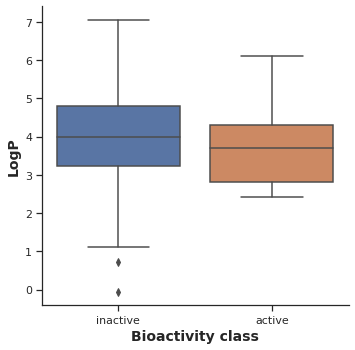

In [ ]:
boxplot(df_pIC50_extremes, "LogP", "Part02/LogP_boxplot")

### Number of hydrogen bond donors

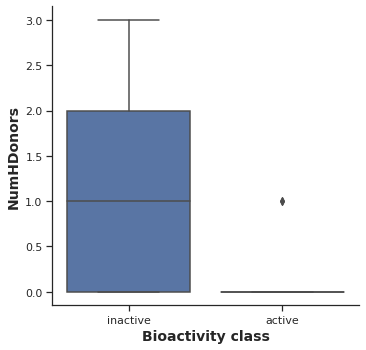

In [ ]:
# df_pIC50_extremes.info()
boxplot(df_pIC50_extremes, "NumHDonors", "Part02/NumHDonors_boxplot")

### Number of hydrogen bond acceptors

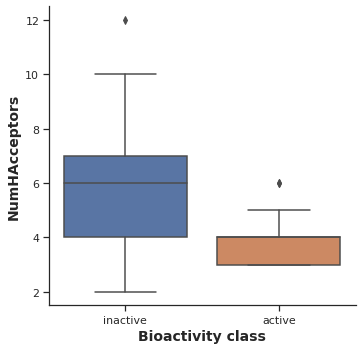

In [ ]:
# df_pIC50_extremes.info()
boxplot(df_pIC50_extremes, "NumHAcceptors", "Part02/NumHAcceptors_boxplot")

### Molecular weight

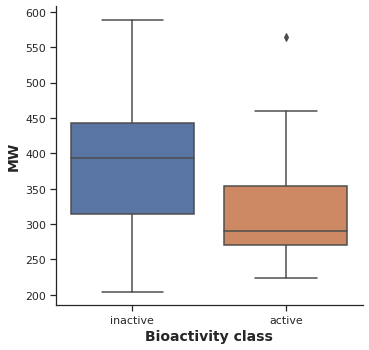

In [ ]:
# df_pIC50_extremes.info()
boxplot(df_pIC50_extremes, "MW", "Part02/MW_boxplot")

### Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(dataframe, descriptor, verbose=False):
  # source: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = dataframe[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = dataframe[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  # filename = 'mannwhitneyu_' + descriptor + '.csv'
  # results.to_csv(filename)

  # returns a dataframe
  return results

In [ ]:
col_names = ["pIC50", "LogP", "NumHAcceptors", "NumHDonors", "MW"]

mannwhitney_df = pd.DataFrame(columns = ["Descriptor", "Statistics", "p", "alpha", "Interpretation"])

for col_name in col_names:
  new_row = mannwhitney(df_pIC50_extremes, col_name)
  mannwhitney_df = pd.concat([mannwhitney_df, new_row])

mannwhitney_df

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)
0,LogP,712.5,2.958045e-01,0.05,Same distribution (fail to reject H0)
0,NumHAcceptors,415.0,1.557280e-03,0.05,Different distribution (reject H0)
0,NumHDonors,299.5,2.443955e-05,0.05,Different distribution (reject H0)
0,MW,409.5,1.524517e-03,0.05,Different distribution (reject H0)


### Interpretation of statistical results

The Mann-Whitney U test is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed. [Source](https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php)

In this scenario, we are comparing the active and inactive class to see if there is a statistical difference between the classes. 

pIC50 is obviously significantly different between the classes as IC50 was used to define the classes.

Of the four Lipinsky descriptors (LogP (water/ fat solubility), hydrogen bond donors and hydrogen bond acceptors, molecular weight), only **LogP exhibited no statistically significant difference between the bioactivity classes defined in Part01**.